## Exploring the dataset
* Cat-Dog Dataset from Oxfords-PET

In [38]:
import os
import pandas as pd
import numpy as np

In [9]:
data_path = os.path.join(os.path.dirname(os.getcwd()),"Data")

In [14]:
annotations_trainval = os.path.join(data_path,"annotations\\annotations\\trainval.txt")

In [21]:
column_headers = ["image","class_id","species","breed_id"]
annotations_df = pd.read_csv(annotations_trainval, names=column_headers,sep='\s+')

In [22]:
annotations_df.head()

,image,class_id,species,breed_id
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [23]:
# Species
# 1. Cat
# 2. Dog
annotations_df.groupby("species").count()

,image,class_id,breed_id
species,,,
1,1188,1188,1188
2,2492,2492,2492


## Reading images and it's trimaps

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [132]:
sample_image = os.path.join(data_path,"images\\images\\boxer_3.jpg")
sample_trimap = os.path.join(data_path,"annotations\\annotations\\trimaps\\boxer_3.png")

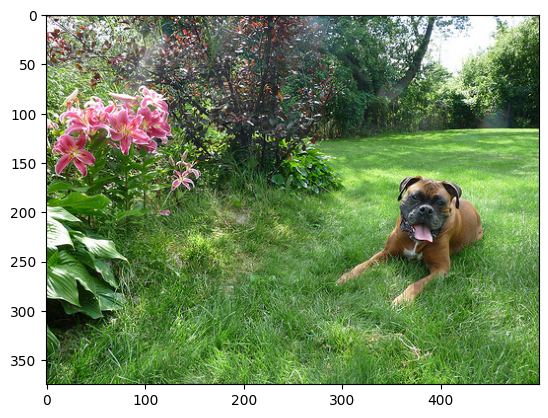

In [133]:
# Load the image
img = mpimg.imread(sample_image)

# Display the image
plt.imshow(img)
plt.axis('on')  # Optional: turn off axis
plt.show()

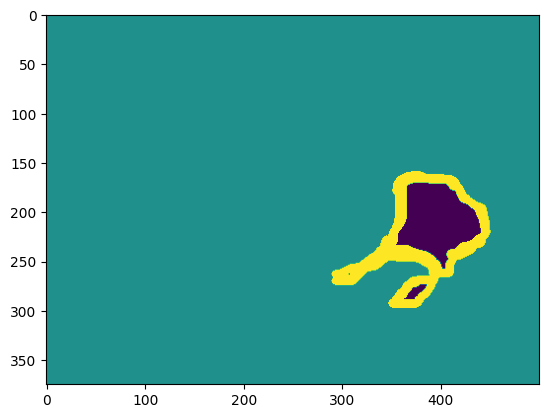

In [134]:
img_trimap = mpimg.imread(sample_trimap)

# Show its segmentation mask
plt.imshow(img_trimap)
plt.axis('on')  # Optional: turn off axis
plt.show()

In [135]:
np.unique(img_trimap)

array([0.00392157, 0.00784314, 0.01176471], dtype=float32)

In [136]:
img_trimap.shape

(375, 500)

In [137]:
img_trimap[np.isclose(img_trimap,0.00784314)] = 0 # background
img_trimap[np.isclose(img_trimap,0.00392157)] = 255 # object
img_trimap[np.isclose(img_trimap,0.01176471)] = 255 # Border

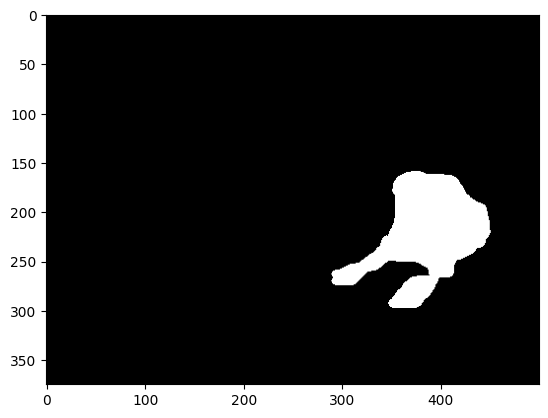

In [138]:
# Show its segmentation mask
plt.imshow(img_trimap,cmap='gray')
plt.axis('on')  # Optional: turn off axis
plt.show()